<a href="https://colab.research.google.com/github/shadab4150/practice_projects/blob/master/Covid_19_india_16may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/covid19-corona-virus-india-dataset (3).zip'

Archive:  /content/covid19-corona-virus-india-dataset (3).zip
  inflating: api.ipynb               
  inflating: complete.csv            
  inflating: district_level_latest.csv  
  inflating: nation_level_daily.csv  
  inflating: patients_data.csv       
  inflating: state_level_latest.csv  
  inflating: tests_daily.csv         
  inflating: tests_latest_state_level.csv  
  inflating: web_scraping.ipynb      
  inflating: zones.csv               


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style('darkgrid')
from scipy.optimize import curve_fit ;

In [2]:
df = pd.read_csv('complete.csv')
pat = pd.read_csv('/content/patients_data.csv')
dis = pd.read_csv('/content/district_level_latest.csv')
state = pd.read_csv('/content/state_level_latest.csv')
nat = pd.read_csv('/content/nation_level_daily.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,10,11,13,20) have mixed types.Specify dtype option on import or set low_memory=False.



In [0]:
df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [0]:
sta = df.groupby(by=['Name of State / UT'])

In [0]:
delhi = sta.get_group('Delhi')

In [6]:
delhi.dtypes

Date                                           object
Name of State / UT                             object
Total Confirmed cases (Indian National)         int64
Total Confirmed cases ( Foreign National )      int64
Cured/Discharged/Migrated                       int64
Latitude                                      float64
Longitude                                     float64
Death                                           int64
Total Confirmed cases                           int64
dtype: object

In [0]:
delhi['chanege'] = delhi['Total Confirmed cases'].pct_change()*100

In [0]:
delhi['active'] = delhi['Total Confirmed cases']-delhi['Cured/Discharged/Migrated'];

In [17]:
delhi.tail()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases,chanege,active
1829,2020-05-12,Delhi,0,0,2129,28.7041,77.1025,73,7233,4.477828,5104
1862,2020-05-13,Delhi,0,0,2512,28.7041,77.1025,86,7639,5.613162,5127
1895,2020-05-14,Delhi,0,0,2858,28.7041,77.1025,106,7998,4.699568,5140
1928,2020-05-15,Delhi,0,0,3045,28.7041,77.1025,115,8470,5.901475,5425
1961,2020-05-16,Delhi,0,0,3518,28.7041,77.1025,123,8895,5.017710,5377


In [18]:
active_del = delhi.active.tolist();len(active_del)

76

In [19]:
cases = delhi['Total Confirmed cases'].values;cases

array([   1,    1,    1,    2,    3,    3,    3,    4,    4,    5,    6,
          6,    7,    7,    7,    8,   10,   12,   17,   26,   29,   29,
         30,   31,   36,   36,   39,   39,   53,   97,  152,  152,  219,
        386,  445,  503,  523,  576,  669,  720,  903, 1069, 1154, 1510,
       1561, 1578, 1640, 1707, 1893, 2003, 2081, 2156, 2248, 2376, 2514,
       2625, 2918, 3108, 3314, 3439, 3515, 3738, 4122, 4549, 4898, 5104,
       5532, 5980, 6318, 6542, 6923, 7233, 7639, 7998, 8470, 8895])

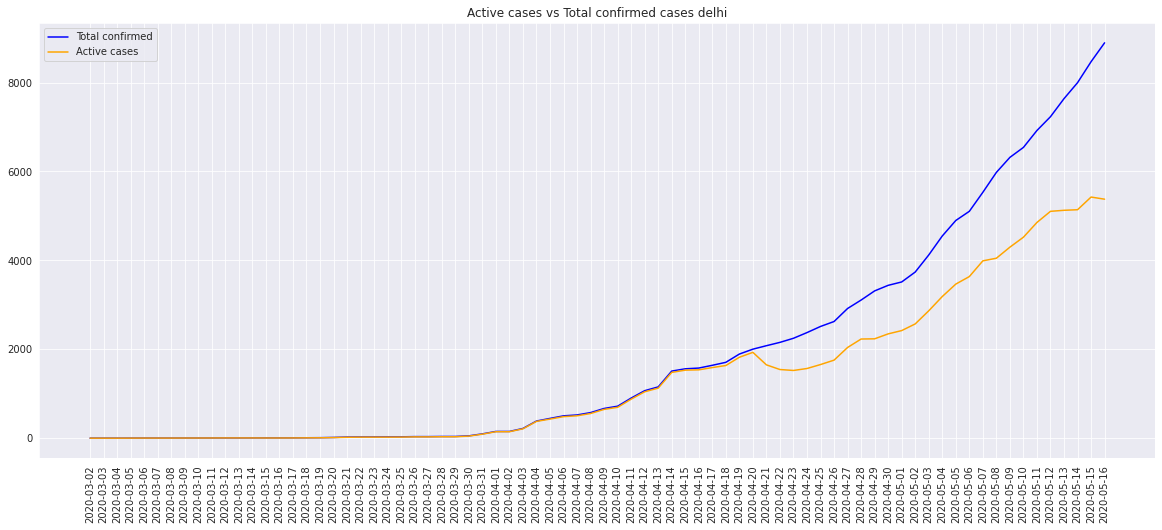

In [34]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=np.arange(76),y=cases,color='blue',label='Total confirmed')
sns.lineplot(x=np.arange(76),y=active_del,color='orange',label='Active cases')
plt.xticks(np.arange(76),delhi.Date.values.tolist(),rotation=90);
plt.title('Active cases vs Total confirmed cases delhi');

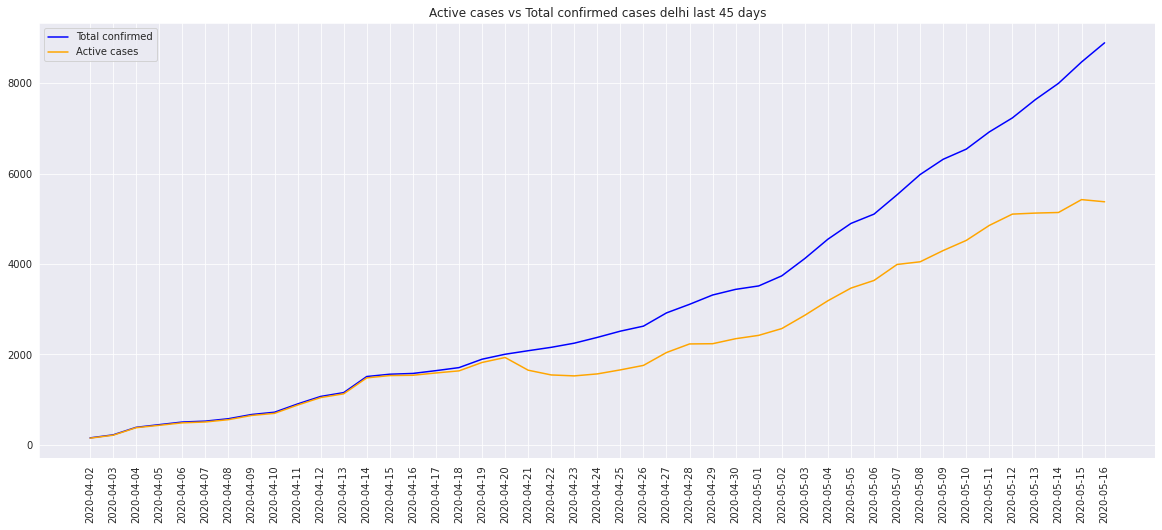

In [53]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=np.arange(76)[-45:],y=cases[-45:],color='blue',label='Total confirmed')
sns.lineplot(x=np.arange(76)[-45:],y=active_del[-45:],color='orange',label='Active cases')
plt.xticks(np.arange(76)[-45:],delhi.Date.values.tolist()[-45:],rotation=90);
plt.title('Active cases vs Total confirmed cases delhi last 45 days');

In [0]:
grow = []
val = [0]+cases
for i in range(len(val)-1):
  a = abs(val[i+1]-val[i])
  grow.append(a)
  


In [0]:
delhi_st = pd.read_csv('/content/state_wise_daily.csv')

In [0]:
delhi

### For delhi

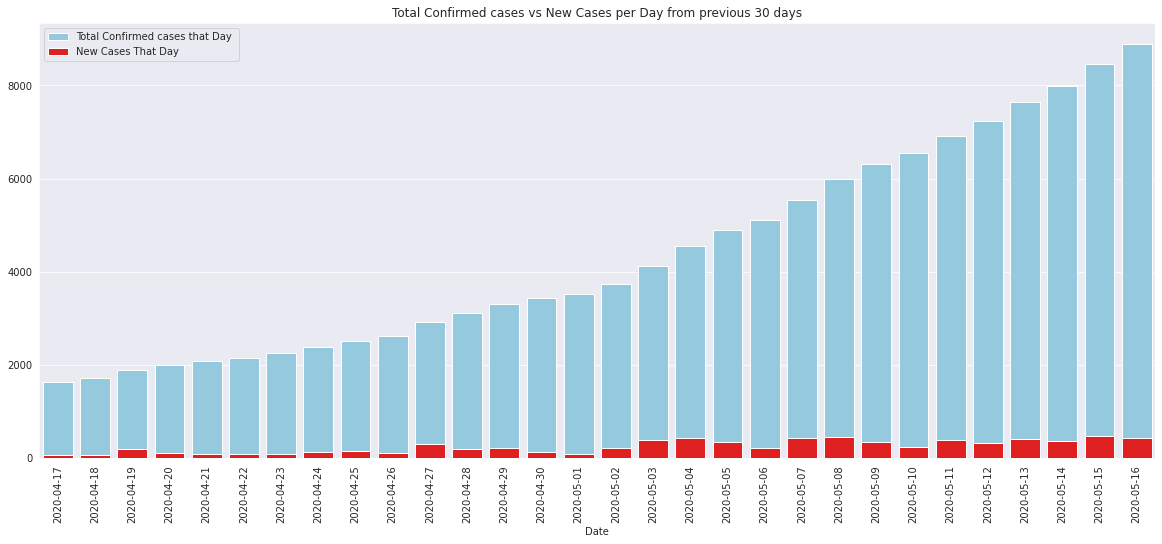

In [35]:
plt.figure(1,figsize=(20,8))
sns.barplot(x=delhi.Date[-30:],y=cases[-30:],color='skyblue',label='Total Confirmed cases that Day ');
sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title("Total Confirmed cases vs New Cases per Day from previous 30 days")
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);
plt.legend()

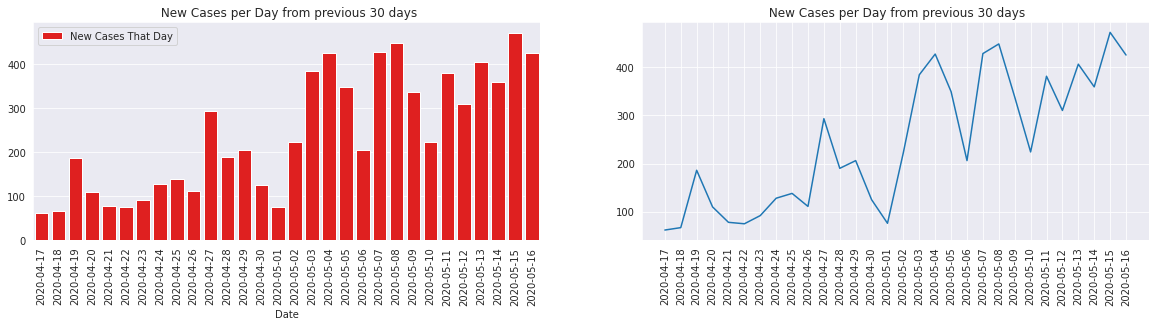

In [36]:
plt.figure(1,figsize=(20,4))
plt.subplot(121)
sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title(" New Cases per Day from previous 30 days")
#plt.plot(grow[-30:])
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);
plt.legend()
plt.subplot(122)
#sns.barplot(x=delhi.Date[-30:],y=grow[-30:],color='red',label='New Cases That Day');
plt.title(" New Cases per Day from previous 30 days")
plt.plot(grow[-30:])
plt.xticks(np.arange(30),delhi.Date.values.tolist()[-30:],rotation=90);

In [0]:
delhi.Date.values

array(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
       '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-

In [0]:
cases

array([   1,    1,    1,    2,    3,    3,    3,    4,    4,    5,    6,
          6,    7,    7,    7,    8,   10,   12,   17,   26,   29,   29,
         30,   31,   36,   36,   39,   39,   53,   97,  152,  152,  219,
        386,  445,  503,  523,  576,  669,  720,  903, 1069, 1154, 1510,
       1561, 1578, 1640, 1707, 1893, 2003, 2081, 2156, 2248, 2376, 2514,
       2625, 2918, 3108, 3314, 3439, 3515, 3738, 4122, 4549, 4898, 5104,
       5532, 5980, 6318, 6542, 6923, 7233, 7639, 7998, 8470])

# Lets fits number of cases to  logistic curve

* A logistic function or logistic curve is a common S-shaped curve (sigmoid curve) with equation

![kd](https://wikimedia.org/api/rest_v1/media/math/render/svg/9e26947596d387d045be3baeb72c11270a065665)

> where

* e = the natural logarithm base (also known as Euler's number),
* x0 = the x value of the sigmoid's midpoint,
* L = the curve's maximum value,
* k = the logistic growth rate or steepness of the curve.[1]


<center><img src ='https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png'></center>

In [0]:
from scipy.optimize import curve_fit 

In [21]:
x = np.arange(1,77)
y = cases;len(cases)

76

In [0]:
def test(x,a,b,c):
  return a/(1+b*np.exp(c*(-x)))

In [0]:
par, par_cov = curve_fit(test, x, cases)

In [24]:
par,par_cov

(array([1.88452276e+04, 6.25825376e+02, 8.29990007e-02]),
 array([[ 3.44965335e+06, -3.02037153e+04, -4.78733452e+00],
        [-3.02037153e+04,  2.22887402e+03,  8.86031294e-02],
        [-4.78733452e+00,  8.86031294e-02,  7.77115831e-06]]))

In [0]:
x2 = np.arange(100)

In [0]:
ans = par[0]/(1+par[1]*np.exp(par[2]*(-x)))
ans2 = par[0]/(1+par[1]*np.exp(par[2]*(-x2))) # 

### Projecting next 25 days for delhi

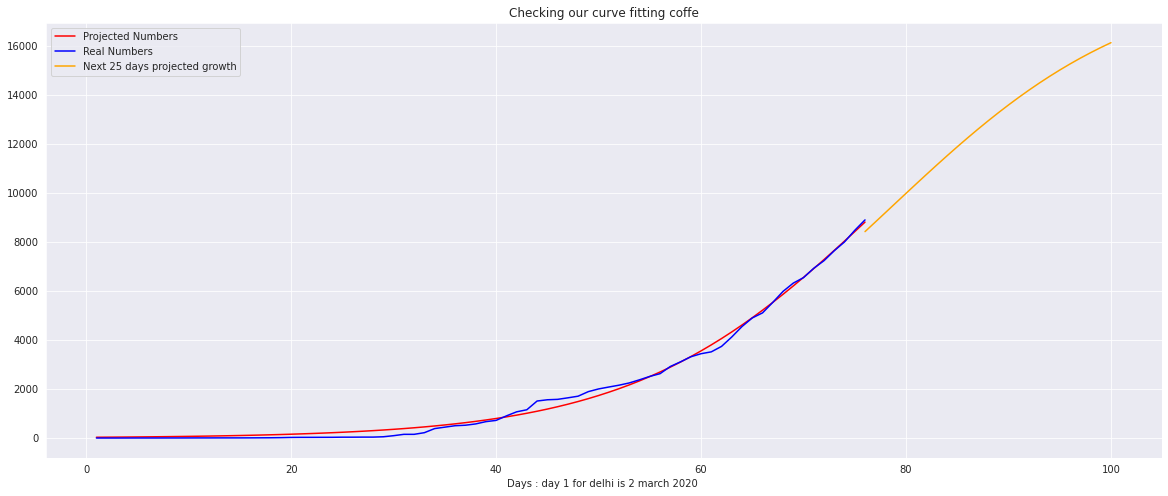

In [44]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=x,y=ans,color='red',label='Projected Numbers')
sns.lineplot(x=x,y=cases,color='blue',label='Real Numbers')
sns.lineplot(x=np.arange(1,101)[-25:],y=ans2[-25:],color='orange',label='Next 25 days projected growth')
plt.title('Checking our curve fitting coffe')
plt.xlabel('Days : day 1 for delhi is 2 march 2020 ')
plt.legend()

In [0]:
ans2[-25:]

array([ 8379.33435447,  8758.82221009,  9139.53956353,  9520.15917827,
        9899.35517902, 10275.82145834, 10648.28950292, 11015.54512829,
       11376.44366465, 11729.92321136, 12075.01566733, 12410.85534432,
       12736.68507147, 13051.85979795, 13355.84778995, 13648.22959433,
       13928.69500188, 14197.03828604, 14453.15201898, 14697.01977653,
       14928.70803886, 15148.35757755, 15356.17459408, 15552.42184362,
       15737.40994239])

In [0]:
cases[-5:]

array([6923, 7233, 7639, 7998, 8470])

In [25]:
nattot = nat.totalconfirmed.tolist();print(len(nattot))

108


In [34]:
nattot= np.array(nattot);len(nattot)

108

In [0]:
n1 = np.arange(1,109)

In [0]:
p,p_coc = curve_fit(test,n1[:100],nattot[:100])   # Fitting the national data

In [0]:
ansN = p[0]/(1+p[1]*np.exp(p[2]*(-n1)))

In [0]:
n2 = np.arange(109,130)
ansN2 = p[0]/(1+p[1]*np.exp(p[2]*(-n2)))

In [0]:
nat['active'] = nat['totalconfirmed']-nat['totalrecovered']

In [45]:
nat.tail()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered,active
103,12 May,74330,2414,24454,3562,120,1905,49876
104,13 May,78056,2551,26417,3726,137,1963,51639
105,14 May,82047,2648,27981,3991,97,1564,54066
106,15 May,85789,2752,30258,3742,104,2277,55531
107,16 May,85789,2752,30263,0,0,5,55526


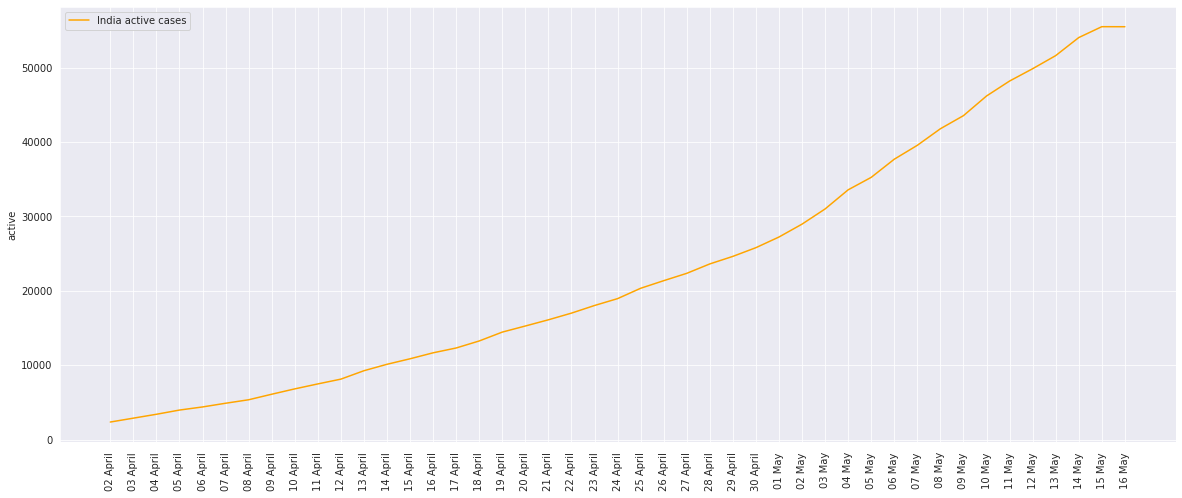

In [54]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=np.arange(108)[-45:],y=nat.active[-45:],color='orange',label='India active cases')
plt.xticks(np.arange(108)[-45:],nat.date.values.tolist()[-45:],rotation=90);

### Projecting next 30 days for india

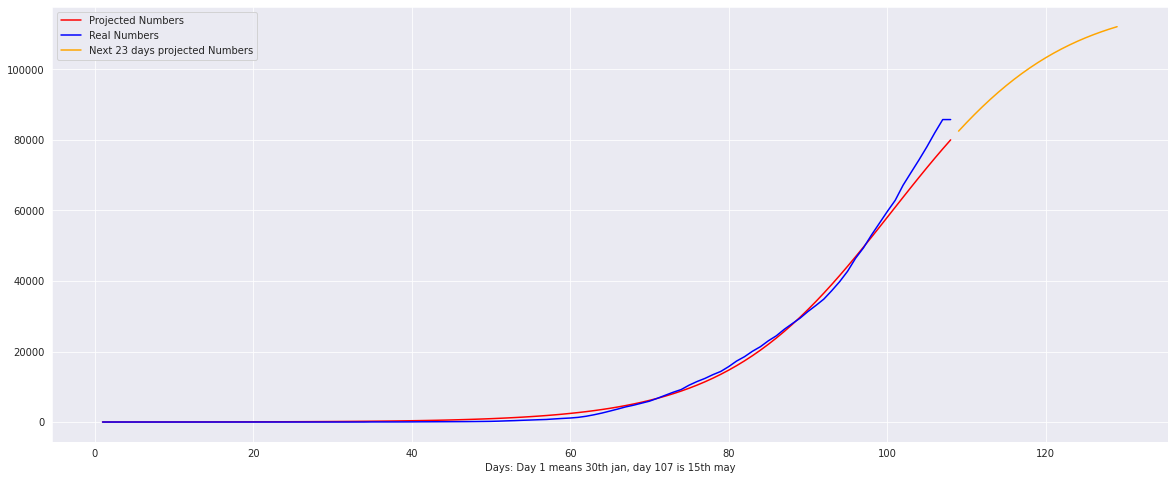

In [42]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=n1,y=ansN,color='red',label='Projected Numbers')
sns.lineplot(x=n1,y=nattot,color='blue',label='Real Numbers');
sns.lineplot(x=n2,y=ansN2,color='orange',label='Next 23 days projected Numbers');
plt.xlabel('Days: Day 1 means 30th jan, day 107 is 15th may');

In [55]:
ansN2

array([ 82512.32615605,  84906.45484192,  87206.89093214,  89409.221399  ,
        91510.25084238,  93507.9452267 ,  95401.35473727,  97190.52083093,
        98876.37246647, 100460.61616759, 101945.6240619 , 103334.32341911,
       104630.09054114, 105836.65118464, 106957.98906219, 107998.26339763,
       108961.73601998, 109852.70807596, 110675.46612254, 111434.23712344,
       112133.15170779])

In [0]:
n3 = np.arange(1,139)
ansN3 = p[0]/(1+p[1]*np.exp(p[2]*(-n3)))

In [0]:
dates = []
for i in range(17,32):
  s = str(i) + ' ' + 'May'
  dates.append(s)
for i in range(1,16):
  s = str(i) + ' ' + 'June'
  dates.append(s)

In [0]:
pred = [round(x) for x in ansN3]

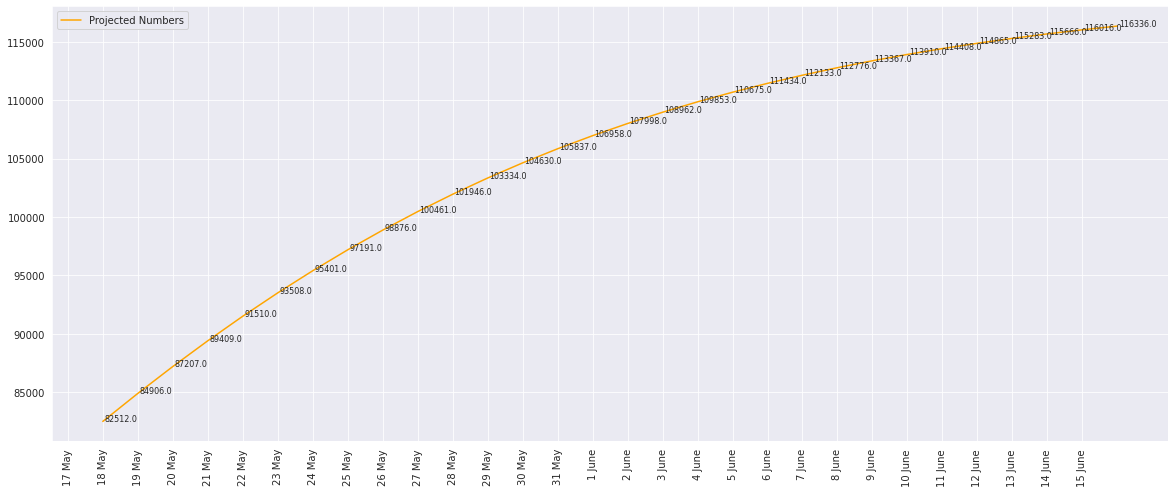

In [86]:
plt.figure(1,figsize=(20,8))
sns.lineplot(x=n3[-30:],y=pred[-30:],color='orange',label='Projected Numbers')
plt.xticks(np.arange(len(n3))[-30:],dates,rotation=90);
list1 = n3[-30:]
score = pred[-30:]
for i in range(len(list1)):
  plt.text(x =list1[i]+0.05 , y =score[i]+0.05, s =round(score[i],3), size = 8)
